In [2]:
import pandas as pd

In [3]:
data = pd.read_csv("/opt/home/Downloads/drinking.csv")

In [4]:
data.head()

,Gender,Alcohol,Height,Cheat,Unnamed: 4
0,Female,15,64.0,0,NaN
1,Male,14,69.0,0,NaN
2,Female,*,66.0,0,NaN
3,Female,10,63.0,0,NaN
4,Male,30,72.0,0,NaN


In [5]:
data.dtypes

Gender         object
Alcohol        object
Height        float64
Cheat           int64
Unnamed: 4    float64
dtype: object

In [6]:
clean = data['Alcohol'].str.extract(r"(^\d+$)", expand=False)
data['Alcohol'] = pd.to_numeric(clean)

Out of the first ten students in the datafile, how many drink 15 or more alcoholic beverages per week?

In [7]:
ten = data.head(10)
ten

,Gender,Alcohol,Height,Cheat,Unnamed: 4
0,Female,15.0,64.0,0,NaN
1,Male,14.0,69.0,0,NaN
2,Female,NaN,66.0,0,NaN
3,Female,10.0,63.0,0,NaN
4,Male,30.0,72.0,0,NaN
5,Female,20.0,67.0,0,NaN
6,Male,15.0,69.0,0,NaN
7,Male,15.0,74.0,0,NaN
8,Male,0.0,72.0,0,NaN
9,Female,0.0,63.0,0,NaN


In [8]:
len(ten[ten["Alcohol"] >= 15])

5

Out of the first ten students in the datafile, how many alcoholic beverages per week does the tallest student drink?

In [9]:
ten.nlargest(1, "Height")["Alcohol"]

7    15.0
Name: Alcohol, dtype: float64

What is the height of the first male in the datafile who would report on cheating?

In [10]:
data[(data["Gender"] == "Male") & (data["Cheat"] == 1)].iloc[0]["Height"]

64.0

**Q1**. What are the drinking habits of students at this university? In particular, what is the typical number of drinks a student has during a week? Do the data suggest that drinking is a problem in this university?

<AxesSubplot:>

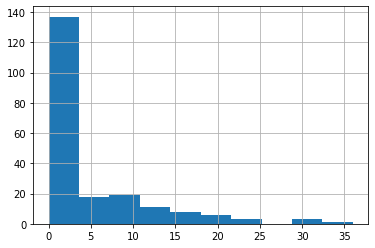

In [39]:
data["Alcohol"].hist()

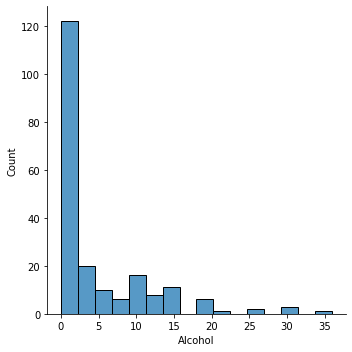

In [65]:
import seaborn as sns
sns.displot(data, x="Alcohol")

<AxesSubplot:xlabel='Alcohol', ylabel='Count'>

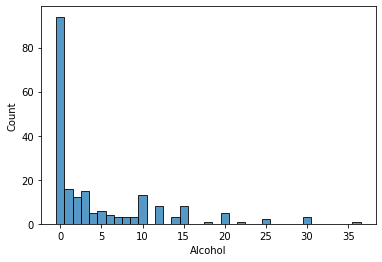

In [70]:
sns.histplot(data, x="Alcohol", discrete=True, fill=True)

In [12]:
data["Alcohol"].describe()

count    206.000000
mean       4.538835
std        6.915938
min        0.000000
25%        0.000000
50%        1.000000
75%        7.000000
max       36.000000
Name: Alcohol, dtype: float64

In [13]:
drinkers = data.loc[data["Alcohol"] > 0]

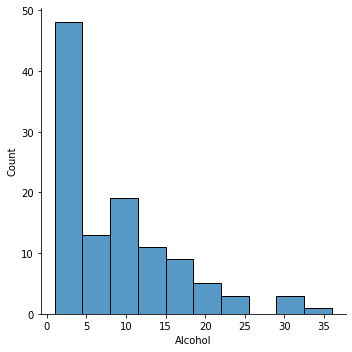

In [14]:
sns.displot(drinkers, x="Alcohol")

In [15]:
drinkers["Alcohol"].describe()

count    112.000000
mean       8.348214
std        7.499802
min        1.000000
25%        2.750000
50%        6.000000
75%       12.000000
max       36.000000
Name: Alcohol, dtype: float64

**Q2**. One of the statistics professors at this university uses the honor system when giving exams. If there were cheating going on during her exams, would the professor be likely to know about it?

In [16]:
data["Cheat"].value_counts()

0    216
1     20
Name: Cheat, dtype: int64

# other stuff

<AxesSubplot:title={'center':'Height'}, xlabel='Gender'>

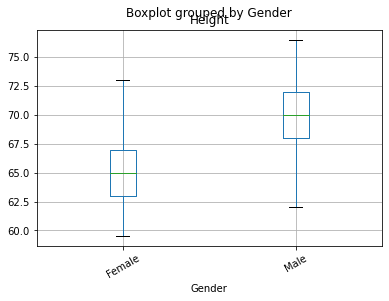

In [33]:
data.boxplot(column="Height", by="Gender", rot=30)

<AxesSubplot:xlabel='Gender', ylabel='Height'>

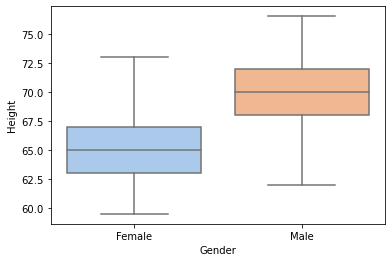

In [53]:
sns.boxplot(data=data, x="Gender", y="Height", palette="pastel")